In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score , classification_report

from mlxtend.frequent_patterns import apriori , association_rules

import warnings
warnings.filterwarnings("ignore")

In [119]:
# Importing Datasets

Customers_data = pd.read_excel(r"D:\Projects\Finding-Marketing-Insights\Datasets\CustomersData.xlsx")
Discount_coupon = pd.read_csv(r"D:\Projects\Finding-Marketing-Insights\Datasets\Discount_Coupon.csv")
Marketing_spend = pd.read_csv(r"D:\Projects\Finding-Marketing-Insights\Datasets\Marketing_Spend.csv")
Online_sales = pd.read_csv(r"D:\Projects\Finding-Marketing-Insights\Datasets\Online_Sales.csv")
Tax_amount = pd.read_excel(r"D:\Projects\Finding-Marketing-Insights\Datasets\Tax_amount.xlsx")

In [120]:
# shape of each data set :

print('Customers_data - ' , Customers_data.shape)
print('Marketing_spend - ' ,Marketing_spend.shape)
print('Online_sales - ' ,Online_sales.shape)
print('Tax_amount - ' , Tax_amount.shape)
print('Discount_coupon - ', Discount_coupon.shape)

Customers_data -  (1468, 4)
Marketing_spend -  (365, 3)
Online_sales -  (52924, 10)
Tax_amount -  (20, 2)
Discount_coupon -  (204, 4)


# Checking for each Column's Datatype and missing values


##### --------------------------------------- Customer Data ---------------------------------------

In [121]:
print("*" * 16," Customer Data " , "*" * 15)
print("*" * 48)
print()
print(Customers_data.head(3))
print("*" * 48)
print()
print(Customers_data.info())
print()
print("*" * 48)
print()
if Customers_data.isna().sum().sum() == 0 : 
    print('Our Dataset contains No Missing Values')
else: 
    print('Number of missing values in the dataset : ' ,  Customers_data.isna().sum().sum() )

****************  Customer Data  ***************
************************************************

   CustomerID Gender    Location  Tenure_Months
0       17850      M     Chicago             12
1       13047      M  California             43
2       12583      M     Chicago             33
************************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   int64 
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.0+ KB
None

************************************************

Our Dataset contains No Missing Values


In [122]:
# Converting columns to their suitable Datatypes : 

Customers_data['CustomerID'] = Customers_data['CustomerID'].astype("str")

##### --------------------------------------- Discount Coupon ---------------------------------------

In [123]:
print("*" * 18," Customer Data " , "*" * 18)
print("*" * 53)
print()
print(Discount_coupon.head(3))
print()
print("*" * 53)
print()
print(Discount_coupon.info())
print()
print("*" * 53)

print()
if Discount_coupon.isna().sum().sum() == 0 : 
    print('Our Dataset contains No Missing Values')
else: 
    print('Number of missing values in the dataset : ' ,  Discount_coupon.isna().sum().sum() )
print()
print("*" * 53)

******************  Customer Data  ******************
*****************************************************

  Month Product_Category  Coupon_Code  Discount_pct
0   Jan           Apparel      SALE10            10
1   Feb           Apparel      SALE20            20
2   Mar           Apparel      SALE30            30

*****************************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Month              204 non-null    object
 1   Product_Category   204 non-null    object
 2   Coupon_Code        204 non-null    object
 3   Discount_pct       204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB
None

*****************************************************

Our Dataset contains No Missing Values

*****************************************************


In [124]:
# Renaming Column name 'Product_Category' as it contains empty space

Discount_coupon.columns = Discount_coupon.columns.str.replace(" " , '')

##### --------------------------------------- Marketing Spend ---------------------------------------


In [125]:
print("*" * 16," Marketing Spend " , "*" * 15)
print("*" * 50)
print()
print(Marketing_spend.head(3))
print()
print("*" * 50)
print()
print(Marketing_spend.info())
print()
print("*" * 50)
print()
if Marketing_spend.isna().sum().sum() == 0 : 
    print('Our Dataset contains No Missing Values')
else: 
    print('Number of missing values in the dataset : ' ,  Marketing_spend.isna().sum().sum() )
print()
print("*" * 50)

****************  Marketing Spend  ***************
**************************************************

       Date  Offline_Spend  Online_Spend
0  1/1/2019           4500       2424.50
1  1/2/2019           4500       3480.36
2  1/3/2019           4500       1576.38

**************************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB
None

**************************************************

Our Dataset contains No Missing Values

**************************************************


In [126]:
# Converting columns to their suitable Datatypes : 

Marketing_spend['Date'] =  pd.to_datetime(Marketing_spend['Date'] , format = '%m/%d/%Y')

##### --------------------------------------- Online Sales ---------------------------------------


In [127]:
print("*" * 26," Online Sales " , "*" * 26)
print("*" * 68)
print()
print(Online_sales.head(3))
print()
print("*" * 68)
print()
print(Online_sales.info())
print()
print("*" * 68)
print()
if Online_sales.isna().sum().sum() == 0 : 
    print('Our Dataset contains No Missing Values')
else: 
    print('Number of missing values in the dataset : ' ,  Online_sales.isna().sum().sum() )
print()
print("*" * 68)

**************************  Online Sales  **************************
********************************************************************

   CustomerID  Transaction_ID  Transaction_Date     Product_SKU  \
0       17850           16679          20190101  GGOENEBJ079499   
1       17850           16680          20190101  GGOENEBJ079499   
2       17850           16681          20190101  GGOEGFKQ020399   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status  
0         1     153.71               6.5          Used  
1         1     153.71               6.5          Used  
2         1       2.05               6.5          Used  

********************************************************************



In [128]:
# Converting columns to their suitable Datatypes : 


Online_sales['CustomerID'] = Online_sales['CustomerID'].astype('str')
Online_sales['Transaction_ID'] = Online_sales['Transaction_ID'].astype('str')
Online_sales['Transaction_Date'] = pd.to_datetime(Online_sales['Transaction_Date'] , format = '%Y%m%d')



In [129]:
# creating a month column for Analysis

Online_sales['Month'] = Online_sales['Transaction_Date'].dt.strftime('%b')

##### --------------------------------------- Tax Amount ---------------------------------------


In [130]:
print("*" * 27," Tax Amount " , "*" * 27)
print("*" * 68)
print()
print(Tax_amount.head(3))
print()
print("*" * 68)
print()
print(Tax_amount.info())
print()
print("*" * 68)
print()
if Tax_amount.isna().sum().sum() == 0 : 
    print('Our Dataset contains No Missing Values')
else: 
    print('Number of missing values in the dataset : ' ,  Tax_amount.isna().sum().sum() )
print()
print("*" * 68)

***************************  Tax Amount  ***************************
********************************************************************

  Product_Category   GST
0         Nest-USA  0.10
1           Office  0.10
2          Apparel  0.18

********************************************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Category  20 non-null     object 
 1   GST               20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 452.0+ bytes
None

********************************************************************

Our Dataset contains No Missing Values

********************************************************************


#### Merging the Datasets

In [131]:
df = Online_sales.merge(right = Customers_data , how = 'left' , on = 'CustomerID').merge(right = Tax_amount , how = 'left', 
                        on ='Product_Category').merge(right = Discount_coupon , how = 'left' , on =['Product_Category' , 'Month']) 

# 1. Calculate Invoice amount or sale_amount or revenue for each transaction          and item level  . 

Invoice Value =(( Quantity*Avg_price)*(1-Dicount_pct)*(1+GST))+Delivery_Charges

In [132]:
df['Invoice_Value'] = ((-df['Quantity'] * df['Avg_Price']) * (1 - df['Discount_pct']) * (1 + df['GST'])) + df['Delivery_Charges'] 

# 2.Perform Detailed exploratory analysis

### a . Understanding how many customers acquired every month

In [133]:
cust_mon = pd.DataFrame(df.groupby(['Month' , 'CustomerID'])['CustomerID'].unique()).drop(columns = 'CustomerID' ).reset_index()

In [134]:
cust_mon['Month'] =  pd.to_datetime(cust_mon['Month'] , format = '%b')

In [135]:
months = ['Jan' , 'Feb', 'Mar','Apr' ,'May','Jun' ,'Jul','Aug','Sep', 'Oct' ,'Nov', 'Dec'] 

<Figure size 1200x1000 with 0 Axes>

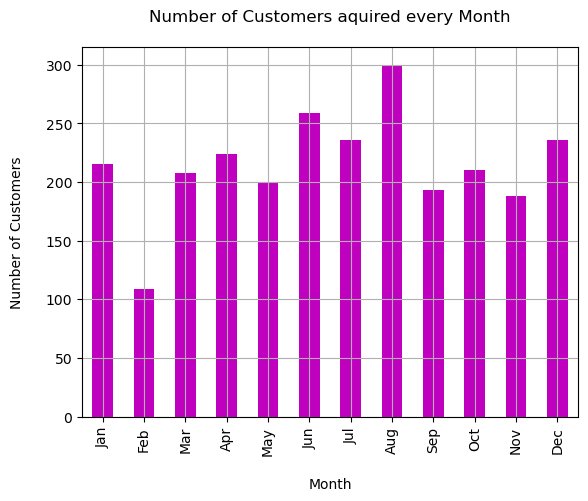

In [136]:
plt.figure(figsize=(12,10))
plt.tight_layout()
cust_mon.groupby('Month').count().plot(kind = 'bar' , legend = False , color = 'm' , xlabel = months)
plt.xlabel('\nMonth')
plt.ylabel('Number of Customers\n')
plt.title("Number of Customers aquired every Month\n")
plt.xticks(ticks = range(0,len(months)) ,labels= months)
plt.grid(True)
plt.show()

### b. Understand the retention of customers on month on month basis

In [137]:
cust_aq = pd.DataFrame(df.groupby(['Month' , 'CustomerID'])['CustomerID'].count())
cust_aq.columns = ['count']
cust_aq = cust_aq.reset_index()

In [138]:
cust_aq['Month'] =  pd.to_datetime(cust_aq['Month'] , format = '%b')

In [139]:
cust_aq = cust_aq[cust_aq['count'] > 1].groupby('Month')['CustomerID'].count()

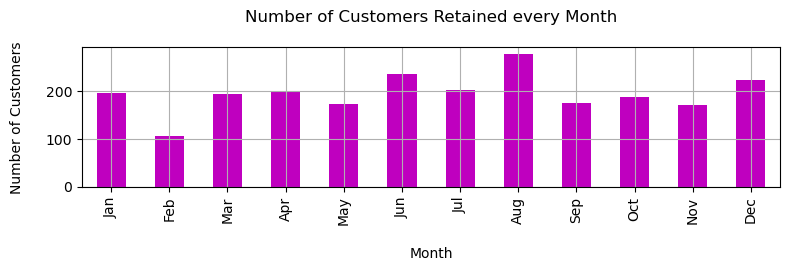

In [140]:
plt.figure(figsize=(8,4))
cust_aq.plot(kind = 'bar' , legend = False , color = 'm')
plt.xlabel('\nMonth')
plt.ylabel('Number of Customers\n')
plt.title("Number of Customers Retained every Month\n")
plt.grid(True)
plt.tight_layout()
plt.xticks(ticks = range(0,len(months)) , labels= months)
plt.show()

#### c. How the revenues from existing/new customers on month on month basis

In [141]:
df['cust_type'] = np.where(df['CustomerID'].duplicated() == True , 'Existing' , 'New')
df['Month'] =  pd.to_datetime(df['Month'] , format = '%b')

<Figure size 2000x2000 with 0 Axes>

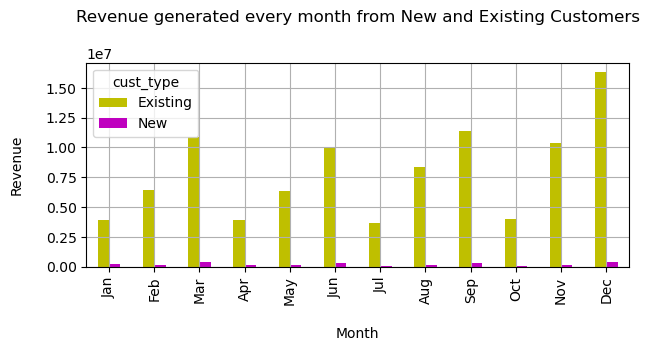

In [142]:
plt.figure(figsize=(20,20))
df.groupby(['Month' ,'cust_type'])['Invoice_Value'].sum().unstack().plot(kind = 'bar' , color = ['y' , 'm'])
plt.xlabel('\nMonth')
plt.ylabel('Revenue\n')
plt.title("Revenue generated every month from New and Existing Customers\n")
plt.grid(True)
plt.tight_layout()
plt.xticks(ticks = range(0,len(months)) ,labels= months)
plt.show()

In [143]:
### -------------------------- Separate Visualizations for each category -------------------------------------

In [144]:
new_df = pd.DataFrame(df[df['cust_type'] == 'New'].groupby('Month')['Invoice_Value'].sum())

<Figure size 800x400 with 0 Axes>

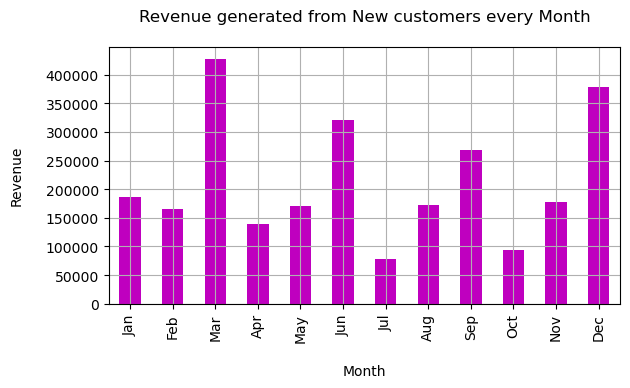

In [145]:
plt.figure(figsize=(8,4))
new_df.plot(kind = 'bar' , legend = False , color = 'm' , )
plt.xlabel('\nMonth')
plt.ylabel('Revenue\n')

plt.grid(True)
plt.tight_layout()
plt.title("Revenue generated from New customers every Month\n")
plt.xticks(ticks = range(0,len(months)) ,labels= months)
plt.show()

In [146]:
neww_df = pd.DataFrame(df[df['cust_type'] == 'Existing'].groupby('Month')['Invoice_Value'].sum())
neww_df.columns = ['Revenue']

In [147]:
neww_df.reset_index(inplace=True)
neww_df['Month'] =  pd.to_datetime(neww_df['Month'] , format = '%b').dt.month

<Figure size 1200x800 with 0 Axes>

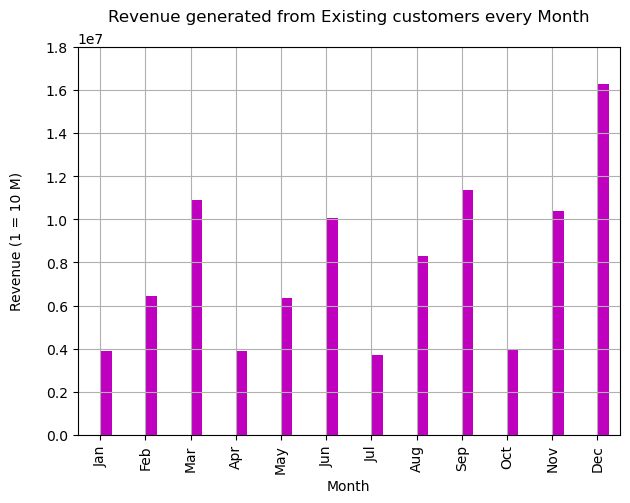

In [148]:
plt.figure(figsize=(12,8))
neww_df.plot(kind = 'bar' , legend = False ,  color = 'm' )
plt.xlabel('Month')
plt.ylabel('Revenue (1 = 10 M)\n')
plt.grid(True)
plt.tight_layout()
plt.title("Revenue generated from Existing customers every Month\n")
plt.ylim((0,18000000))
plt.xticks(ticks = range(0,len(months)) ,labels= months)
plt.show()

#### d. How the discounts playing role in the revenues?

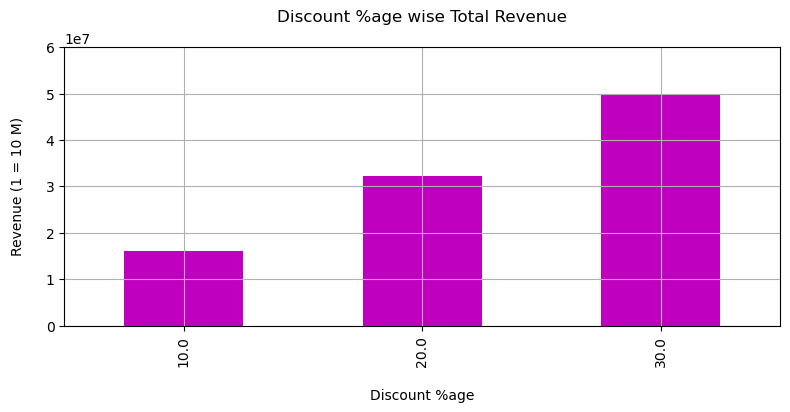

In [149]:
plt.figure(figsize=(8,4))
df.groupby('Discount_pct')['Invoice_Value'].sum().plot(kind = 'bar' , legend = False ,  color = 'm' )
plt.xlabel('\nDiscount %age')
plt.ylabel('Revenue (1 = 10 M)\n')
plt.grid(True)
plt.tight_layout()
plt.title("Discount %age wise Total Revenue\n")
plt.ylim((0,60000000))
plt.show()

#### e. Analyse KPI’s like Revenue, number of orders, average order value, number of customers (existing/new), quantity, by category,              by month, by week, by day etc…

KPIs to be Analysed :- 

-- revenue by month , week , day
-- number of orders by month , week , day
-- Average order value by month , week , day
-- Number of Customers by month , week , day

#### Revenue analysis 

In [150]:
## Monthly Revenue Generation

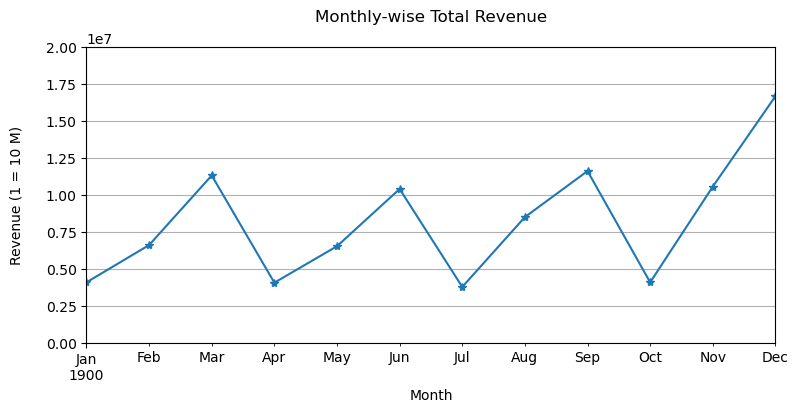

In [151]:
plt.figure(figsize=(8,4))
df.groupby('Month')['Invoice_Value'].sum().plot(kind = 'line' , marker = '*')
plt.xlabel('Month')
plt.ylabel('Revenue (1 = 10 M)\n')
plt.grid(True)
plt.tight_layout()
plt.title("Monthly-wise Total Revenue\n")
plt.ylim((0,20000000))
plt.show()

## Some seasonality can be observed every 3 months

In [152]:
## Week-wise Revenue Generation

In [153]:
df['Weeknum'] = df['Transaction_Date'].dt.isocalendar().week

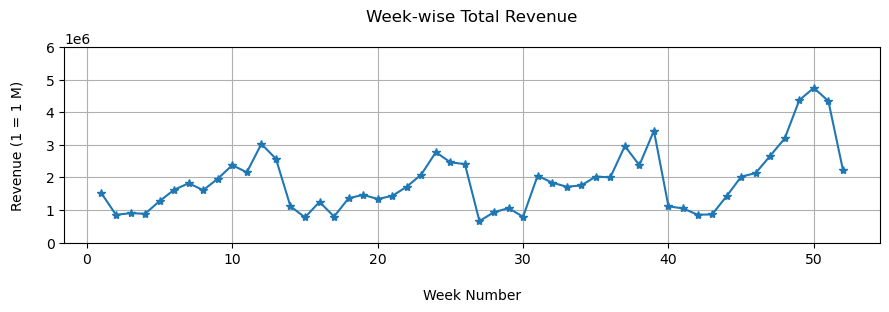

In [154]:
plt.figure(figsize=(9,3))
df.groupby('Weeknum')['Invoice_Value'].sum().plot(kind = 'line', marker = '*')
plt.xlabel('\nWeek Number')
plt.ylabel('Revenue (1 = 1 M)\n')
plt.grid(True)
plt.tight_layout()
plt.title("Week-wise Total Revenue\n")
plt.ylim((0,6000000))
plt.show()

In [155]:
## Day-wise Revenue Generation

In [156]:
df['weekday'] = df['Transaction_Date'].dt.weekday


In [157]:
df['Day'] = df['Transaction_Date'].dt.strftime('%a')
weeks = ['Mon' , 'Tue' , 'Wed' , 'Thu' , 'Fri' , 'Sat' , 'Sun']

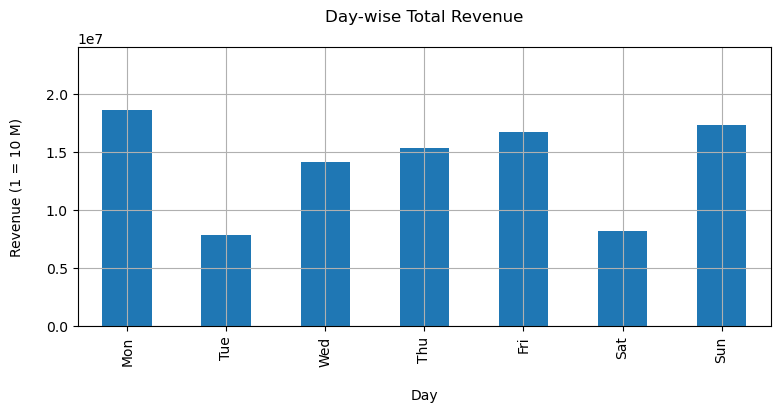

In [158]:
plt.figure(figsize=(8,4))
df.groupby('Day')['Invoice_Value'].sum().plot(kind = 'bar')
plt.xlabel('\nDay')
plt.ylabel('Revenue (1 = 10 M)\n')
plt.grid(True)
plt.tight_layout()
plt.title("Day-wise Total Revenue\n")
plt.ylim((0,24000000))
plt.xticks(ticks = range(0,len(weeks)) ,labels= weeks)
plt.show()

#### Order Numbers Analysis 

In [159]:
# Monthly Orders Analysis

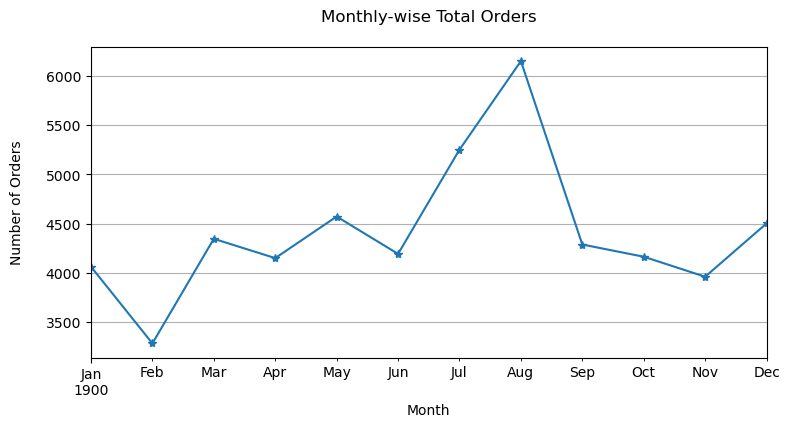

In [160]:
plt.figure(figsize=(8,4))
df.groupby('Month')['Transaction_ID'].count().plot(kind = 'line', marker = '*')
plt.xlabel('Month')
plt.ylabel('Number of Orders\n')
plt.grid(True)
plt.tight_layout()
plt.title("Monthly-wise Total Orders\n")
plt.show()

## In the month of August a peak in the Number of Orders can be observed 

In [161]:
## Week-wise Orders made

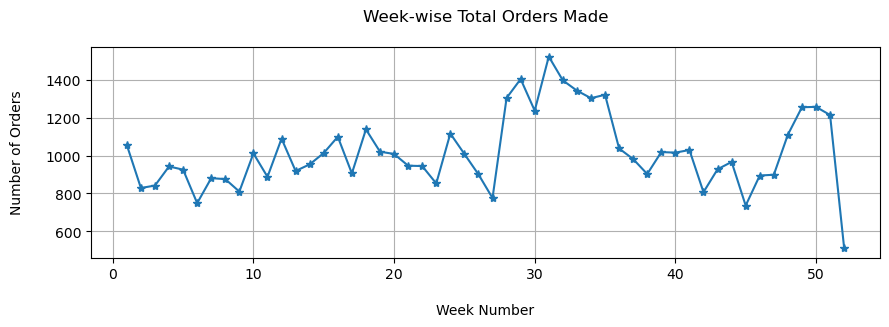

In [162]:
plt.figure(figsize=(9,3))
df.groupby('Weeknum')['Transaction_ID'].count().plot(kind = 'line', marker = '*')
plt.xlabel('\nWeek Number')
plt.ylabel('Number of Orders\n')
plt.grid(True)
plt.tight_layout()
plt.title("Week-wise Total Orders Made\n")
plt.show()

In [163]:
## Day-wise Orders made

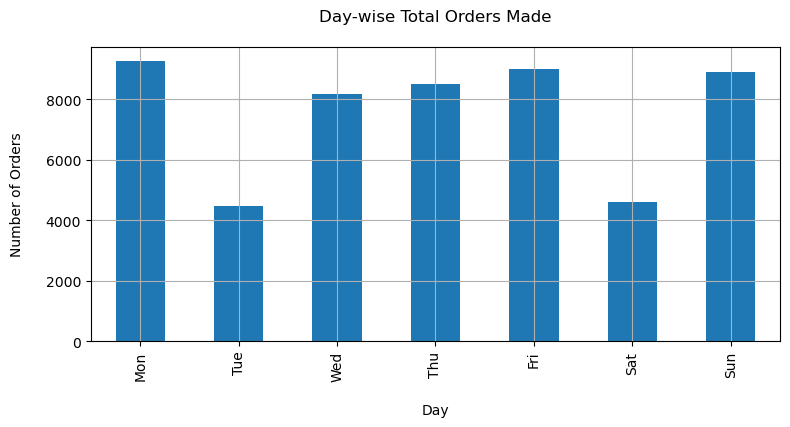

In [164]:
plt.figure(figsize=(8,4))
df.groupby('Day')['Transaction_ID'].count().plot(kind = 'bar')
plt.xlabel('\nDay')
plt.ylabel('Number of Orders\n')
plt.grid(True)
plt.tight_layout()
plt.title("Day-wise Total Orders Made\n")
plt.xticks(ticks = range(0,len(weeks)) ,labels= weeks)
plt.show()

#### Average Order Value analysis 

In [165]:
## Average Order Value by Month

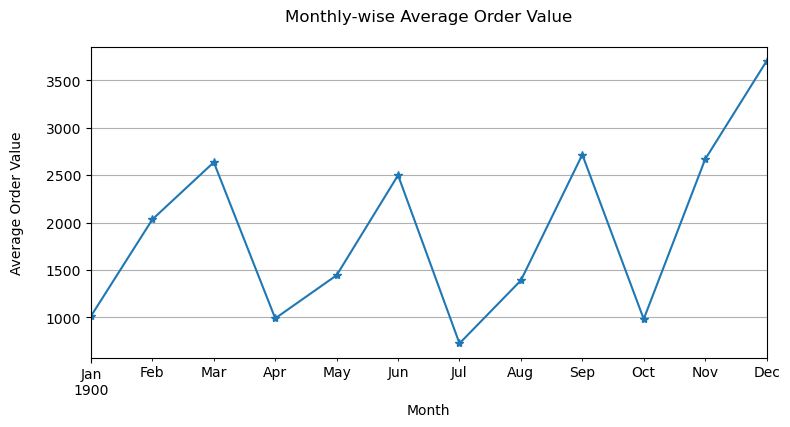

In [166]:
plt.figure(figsize=(8,4))
df.groupby('Month')['Invoice_Value'].mean().plot(kind = 'line', marker = '*')
plt.xlabel('Month')
plt.ylabel('Average Order Value\n')
plt.grid(True)
plt.tight_layout()
plt.title("Monthly-wise Average Order Value\n")
plt.show()

In [167]:
## Average Order Value by Week

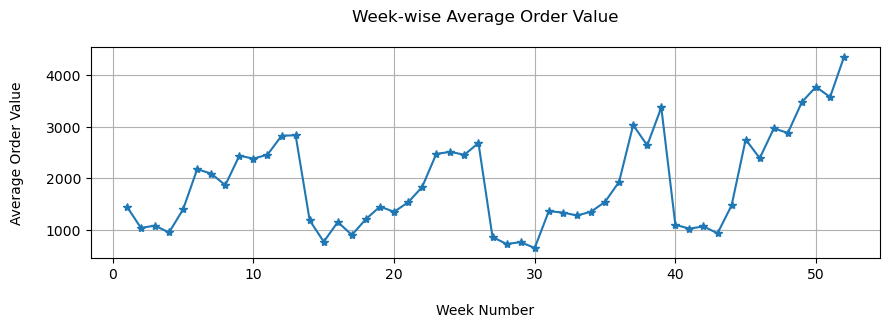

In [168]:
plt.figure(figsize=(9,3))
df.groupby('Weeknum')['Invoice_Value'].mean().plot(kind = 'line', marker = '*')
plt.xlabel('\nWeek Number')
plt.ylabel('Average Order Value\n')
plt.grid(True)
plt.tight_layout()
plt.title("Week-wise Average Order Value\n")
plt.show()

In [169]:
## Average Order Value by Days

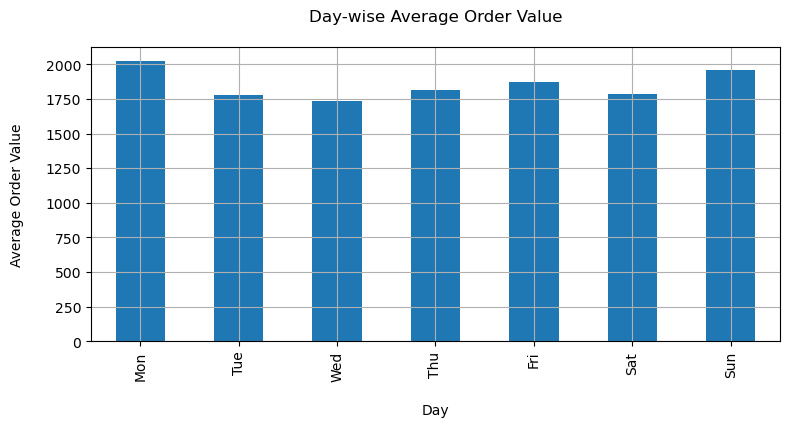

In [170]:
plt.figure(figsize=(8,4))
df.groupby('Day')['Invoice_Value'].mean().plot(kind = 'bar')
plt.xlabel('\nDay')
plt.ylabel('Average Order Value\n')
plt.grid(True)
plt.tight_layout()
plt.title("Day-wise Average Order Value\n")
plt.xticks(ticks = range(0,len(weeks)) ,labels= weeks)
plt.show()

#### Customers Analysis

In [171]:
## Number of Customers by Month

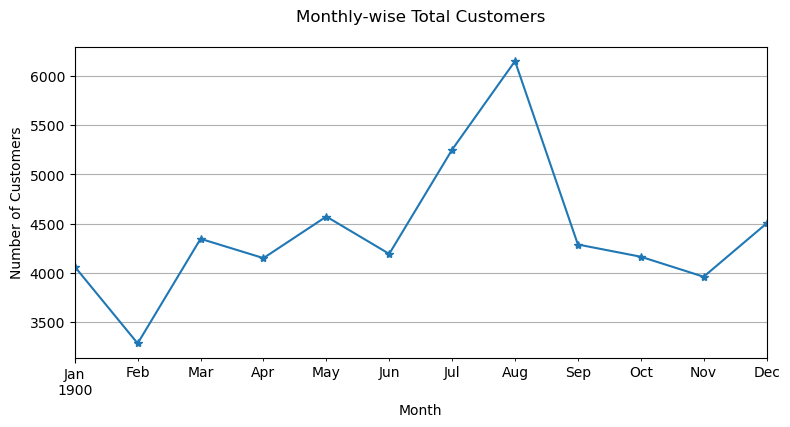

In [172]:
plt.figure(figsize=(8,4))
df.groupby('Month')['CustomerID'].count().plot(kind = 'line', marker = '*')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.tight_layout()
plt.title("Monthly-wise Total Customers\n")
plt.show()

In [173]:
## Number of Customers by Week

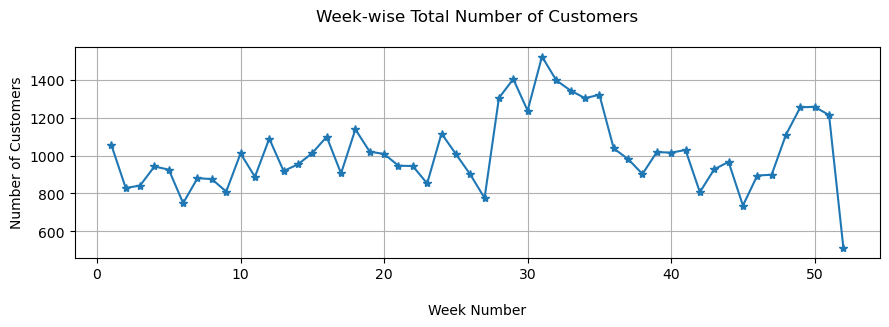

In [174]:
plt.figure(figsize=(9,3))
df.groupby('Weeknum')['CustomerID'].count().plot(kind = 'line', marker = '*')
plt.xlabel('\nWeek Number')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.tight_layout()
plt.title("Week-wise Total Number of Customers\n")
plt.show()

In [175]:
## Number of Customers by Day

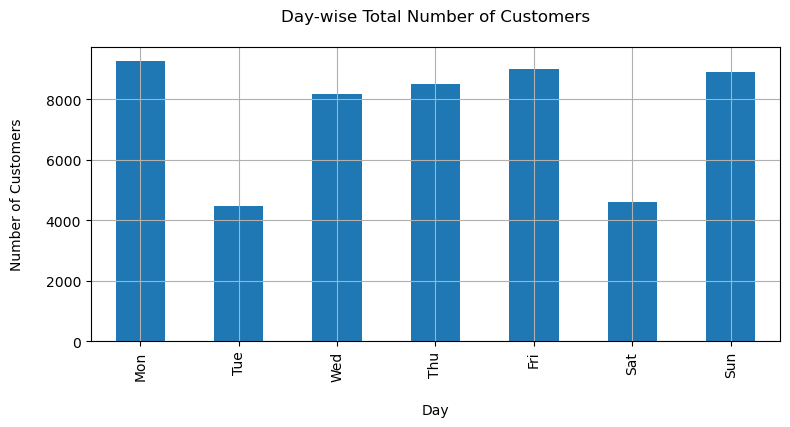

In [176]:
plt.figure(figsize=(8,4))
df.groupby('Day')['CustomerID'].count().plot(kind = 'bar')
plt.xlabel('\nDay')
plt.ylabel('Number of Customers\n')
plt.grid(True)
plt.tight_layout()
plt.title("Day-wise Total Number of Customers\n")
plt.xticks(ticks = range(0,len(weeks)) ,labels= weeks)
plt.show()

## f. Understand the trends/seasonality of sales by category, location, month etc…

In [177]:
## Trends/Seasonality observed in the sales of Each Product Category throughout the Year

<Figure size 800x400 with 0 Axes>

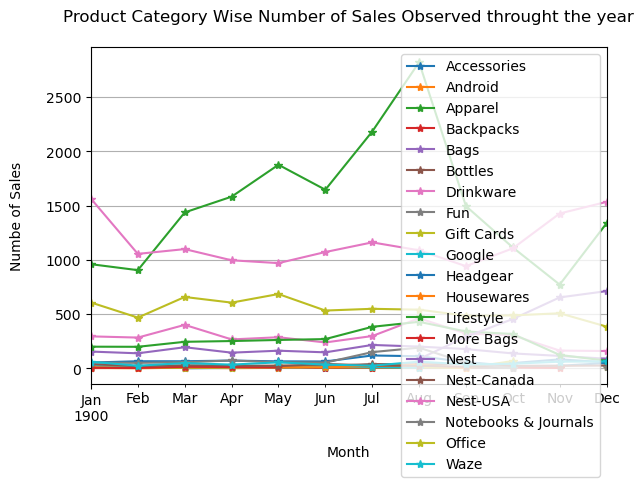

In [178]:
plt.figure(figsize=(8,4))
df.groupby(['Month' , 'Product_Category'])['Transaction_ID'].count().unstack().plot(kind = 'line', marker = '*')
plt.legend(loc = 'best')
plt.xlabel('\nMonth')
plt.ylabel('Numbe of Sales\n')
plt.title('Product Category Wise Number of Sales Observed throught the year\n')
plt.grid(True)
plt.tight_layout()
plt.show()

# There can be a peak observed in the Purchases made for 'Apparel' Category in the month of 'August'

In [179]:
## Trends/Seasonality observed in the sales for each location throughout the Year

<Figure size 800x400 with 0 Axes>

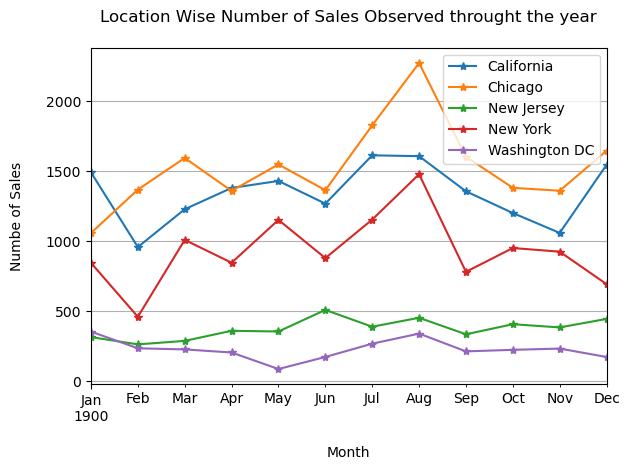

In [180]:
plt.figure(figsize=(8,4))
df.groupby(['Month' , 'Location'])['Transaction_ID'].count().unstack().plot(kind = 'line', marker = '*')
plt.legend(loc = 'best')
plt.xlabel('\nMonth')
plt.ylabel('Numbe of Sales\n')
plt.title('Location Wise Number of Sales Observed throught the year\n')
plt.grid(True)
plt.tight_layout()
plt.show()

In [181]:
## Trends/Seasonality observed in the sales for each month throughout the Year

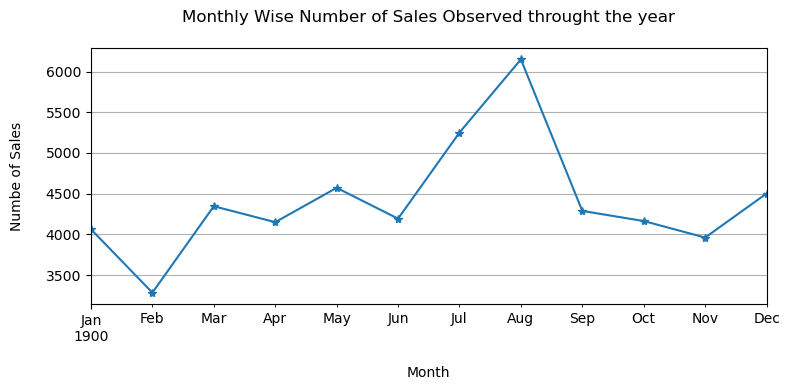

In [182]:
plt.figure(figsize=(8,4))
df.groupby(['Month'])['Transaction_ID'].count().plot(kind = 'line', marker = '*' )
plt.xlabel('\nMonth')
plt.ylabel('Numbe of Sales\n')
plt.title('Monthly Wise Number of Sales Observed throught the year\n')
plt.grid(True)
plt.tight_layout()
plt.show()

## In the month of August a peak in the Number of Orders can be observed 

## g. How number order varies and sales with different days?

In [183]:
## Day-wise Total number of Orders

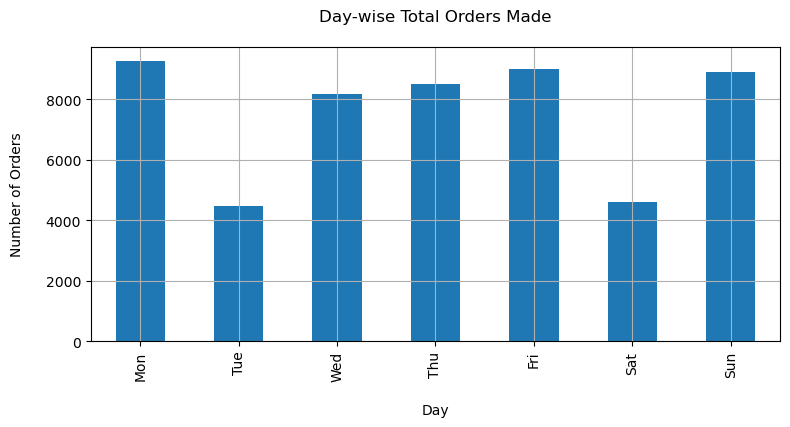

In [184]:
plt.figure(figsize=(8,4))
df.groupby('Day')['Transaction_ID'].count().plot(kind = 'bar')
plt.xlabel('\nDay')
plt.ylabel('Number of Orders\n')
plt.grid(True)
plt.tight_layout()
plt.title("Day-wise Total Orders Made\n")
plt.xticks(ticks = range(0,len(weeks)) ,labels= weeks)
plt.show()

In [185]:
## Day-wise Total Sales

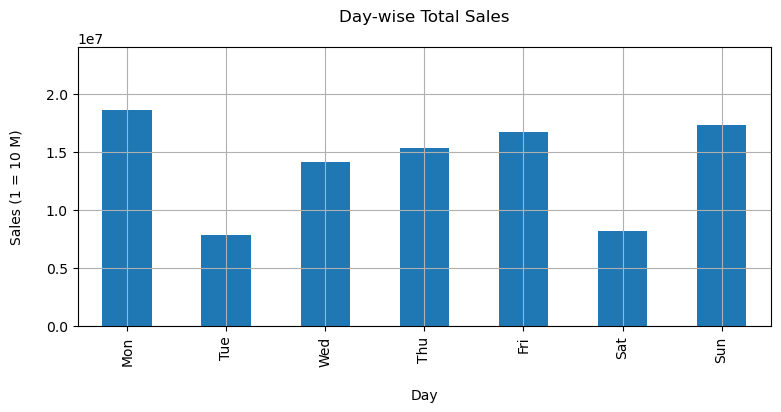

In [186]:
plt.figure(figsize=(8,4))
df.groupby('Day')['Invoice_Value'].sum().plot(kind = 'bar')
plt.xlabel('\nDay')
plt.ylabel('Sales (1 = 10 M)\n')
plt.grid(True)
plt.tight_layout()
plt.title("Day-wise Total Sales\n")
plt.ylim((0,24000000))
plt.xticks(ticks = range(0,len(weeks)) ,labels= weeks)
plt.show()

## h. Calculate the Revenue, Marketing spend, percentage of marketing spend out of revenue, Tax, percentage of delivery charges by month.

In [187]:
df['Month_name'] = df['Transaction_Date'].dt.strftime("%b")
df['Tax'] = (df['GST']*df['Invoice_Value'])
df['Month_num'] = df['Transaction_Date'].dt.strftime("%m")

In [188]:
Marketing_spend['Month']  = Marketing_spend['Date'].dt.strftime("%b")
Marketing_spend['Marketing_Spend'] = Marketing_spend['Offline_Spend'] + Marketing_spend['Online_Spend']

In [189]:
M_spend_analysis  = pd.DataFrame(df.groupby(['Month_name' , 'Month_num'])[['Invoice_Value' ,'Tax' ,'Delivery_Charges']].sum()).reset_index().merge(right = pd.DataFrame
                  (Marketing_spend.groupby("Month")['Marketing_Spend'].sum()).reset_index() , how = 'inner' , left_on= 'Month_name' , right_on= 'Month').drop(columns = 'Month_name')

In [190]:
M_spend_analysis['Marketing_Spend_%age'] = round((M_spend_analysis['Marketing_Spend']/M_spend_analysis['Invoice_Value'])*100 , 2)

In [191]:
M_spend_analysis['Delivery_Charges_%age'] = round((M_spend_analysis['Delivery_Charges']/M_spend_analysis['Invoice_Value'])*100 , 2)

In [192]:
M_spend_analysis.sort_values('Month_num' , inplace=True)

In [193]:
M_spend_analysis.columns = ['Month_num', 'Revenue', 'Tax', 'Delivery_Charges', 'Month','Marketing_Spend', 'Marketing_Spend_%age', 
                          'Delivery_Charges_%age']

In [194]:
M_spend_analysis = M_spend_analysis[['Month','Revenue' ,  'Marketing_Spend', 'Marketing_Spend_%age', 'Tax' ,'Delivery_Charges_%age']]

In [195]:
print("\nRevenue, Marketing spend, percentage of marketing spend out of revenue, Tax, percentage of delivery charges by month :")

M_spend_analysis


Revenue, Marketing spend, percentage of marketing spend out of revenue, Tax, percentage of delivery charges by month :


,Month,Revenue,Marketing_Spend,Marketing_Spend_%age,Tax,Delivery_Charges_%age
4,Jan,4.075255e+06,154928.95,3.80,4.648917e+05,1.45
3,Feb,6.600518e+06,137107.92,2.08,7.909887e+05,0.75
7,Mar,1.131131e+07,122250.09,1.08,1.400239e+06,0.54
0,Apr,4.051376e+06,157026.83,3.88,5.053465e+05,1.02
8,May,6.521930e+06,118259.64,1.81,8.069751e+05,0.63
6,Jun,1.039707e+07,134318.14,1.29,1.256784e+06,0.36
5,Jul,3.765625e+06,120217.85,3.19,4.502871e+05,1.29
1,Aug,8.494319e+06,142904.15,1.68,9.615404e+05,0.72
11,Sep,1.161119e+07,135514.54,1.17,1.287718e+06,0.35
10,Oct,4.076950e+06,151224.65,3.71,4.063464e+05,1.13


## i. How marketing spend is impacting on revenue?

In [196]:
print('*'*67)
print('Correlation between Market Spend and Revenue : ', M_spend_analysis['Revenue'].corr(M_spend_analysis['Marketing_Spend']))
print('*'*67)

*******************************************************************
Correlation between Market Spend and Revenue :  0.4172692824788138
*******************************************************************


## j. Which product was appeared in the transactions?

In [197]:
print('Product Categories that have appeared in the Transactions  : \n')
for m in df['Product_Category'].unique():
    print(m)

Product Categories that have appeared in the Transactions  : 

Nest-USA
Office
Apparel
Bags
Drinkware
Lifestyle
Notebooks & Journals
Headgear
Waze
Fun
Nest-Canada
Backpacks
Google
Bottles
Gift Cards
More Bags
Housewares
Android
Accessories
Nest


In [198]:
print('Product Categories that have appeared in the Transactions  : \n')
for m in df['Product_SKU'].unique():
    print(m)

Product Categories that have appeared in the Transactions  : 

GGOENEBJ079499
GGOEGFKQ020399
GGOEGAAB010516
GGOEGBJL013999
GGOEGBMJ013399
GGOEGDHC018299
GGOEGDHG014499
GGOEGDWC020199
GGOEGGOA017399
GGOEGOFH020299
GGOEGOXQ016399
GGOEYAAB031816
GGOENEBQ078999
GGOENEBQ079199
GGOEGAAR010714
GGOEGAEQ027913
GGOEGDWR015799
GGOEGFQB013799
GGOEGOAQ012899
GGOEGOAR021999
GGOEGOBG023599
GGOEGOLC013299
GGOENEBB078899
GGOEAFKQ020599
GGOEGDHC015299
GGOEYFKQ020699
GGOEYOCR078099
GGOEGATB060415
GGOEGDHC074099
GGOEGAAJ080615
GGOEGAAL010615
GGOEGAEB027814
GGOEGAEC029114
GGOEGAER029714
GGOEGAFJ036214
GGOEGAYC068324
GGOEGAYH068425
GGOEGBJR018199
GGOEGFSR022099
GGOEGHPA003010
GGOEGKAA019299
GGOEGPJC019099
GGOEGPJR018999
GGOEGAAJ073414
GGOEWEBB082699
GGOENEBQ079099
GGOEADHB014799
GGOEADWQ015699
GGOEGAPB058615
GGOEGBJC019999
GGOEGHPA002910
GGOEYOBR078599
GGOEGAAB010517
GGOEYAFB073115
GGOEGAAJ073415
GGOEGAPB058214
GGOEGHPJ080110
GGOEAKDH019899
GGOENEBJ081899
GGOENEBQ081699
GGOEGBRD079699
GGOEGBRJ037299
GGOEGFK

## k. Which product was purchased mostly based on the quantity?

In [199]:
print()
print('Product Mostly Purchased Based on Quantity : ')
pd.DataFrame(df.groupby(['Product_SKU','Product_Category'])['Quantity'].sum().sort_values(ascending=False)).reset_index().head(1)


Product Mostly Purchased Based on Quantity : 


,Product_SKU,Product_Category,Quantity
0,GGOEGGOA017399,Office,16234


# Performing Customer Segmentation

## Heuristic (Value based, RFM) – Divide the customers into Premium, Gold, Silver, Standard customers and define strategy on the same.

In [200]:
today = pd.to_datetime('2020-01-01')  # Replace with the current date
cust_seg = df.groupby('CustomerID').agg({
    'Transaction_Date': lambda x: (today - x.max()).days, 
    'Transaction_ID': 'count', 
    'Invoice_Value': 'sum'  
})

print(cust_seg.describe())

       Transaction_Date  Transaction_ID  Invoice_Value
count       1468.000000     1468.000000   1.468000e+03
mean         145.292234       36.051771   6.685374e+04
std          101.936959       50.885680   1.059630e+05
min            1.000000        1.000000   1.590000e+01
25%           56.000000       10.000000   1.136240e+04
50%          132.000000       21.000000   3.563140e+04
75%          221.000000       46.000000   7.969085e+04
max          365.000000      695.000000   1.378800e+06


In [201]:
cust_seg.columns = ['days_since_last_purchase' , 'total_purchases' , 'total_purchase_value']

In [202]:
cust_seg.describe()

,days_since_last_purchase,total_purchases,total_purchase_value
count,1468.000000,1468.000000,1.468000e+03
mean,145.292234,36.051771,6.685374e+04
std,101.936959,50.885680,1.059630e+05
min,1.000000,1.000000,1.590000e+01
25%,56.000000,10.000000,1.136240e+04
50%,132.000000,21.000000,3.563140e+04
75%,221.000000,46.000000,7.969085e+04
max,365.000000,695.000000,1.378800e+06


In [203]:
recency_thresholds = [0, 100, 200, 300, 400]  
frequency_thresholds = [0, 40, 70, 100, 700]  
monetary_thresholds = [0, 10000, 35000,80000, np.inf ]  

In [204]:

cust_seg['R_Segment'] = pd.cut(cust_seg['days_since_last_purchase'], bins=recency_thresholds, labels=[4,3,2,1]) 
cust_seg['F_Segment'] = pd.cut(cust_seg['total_purchases'], bins=frequency_thresholds, labels=[1,2,3,4]) 
cust_seg['M_Segment'] = pd.cut(cust_seg['total_purchase_value'], bins=monetary_thresholds, labels=[1,2,3,4])


In [205]:
cust_seg['R_Segment'] = cust_seg['R_Segment'].astype('int')
cust_seg['F_Segment'] = cust_seg['F_Segment'].astype('int')
cust_seg['M_Segment'] = cust_seg['M_Segment'].astype('int')

In [206]:
cust_seg['RFM_Segment'] = cust_seg['R_Segment'] * 10 + cust_seg['F_Segment'] * 10 + cust_seg['M_Segment']*10

In [207]:
def heuristic_seg(RFM_Segment):
  if RFM_Segment<=40:
    return 'Standard'
  elif (RFM_Segment>40) & (RFM_Segment<=70):
    return 'Silver'
  elif (RFM_Segment>70) & (RFM_Segment<=100):
    return 'Premium'
  else:
    return 'Gold'

In [208]:
cust_seg['heuristic_seg'] = cust_seg['RFM_Segment'].apply(heuristic_seg)

#df = df.merge(cust_seg['heuristic_seg'], on='CustomerID', how='left')

## Scientific (Using K-Means) & Understand the profiles. Define strategy for each segment.

In [209]:
X = cust_seg[['days_since_last_purchase' ,'total_purchases' , 'total_purchase_value']]

In [210]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [211]:
kmeans = KMeans(n_clusters=4,random_state=42)
cust_seg['kmean_seg'] = kmeans.fit_predict(scaled_X)


In [212]:
kmeans_summary = cust_seg.groupby('kmean_seg')[['days_since_last_purchase' ,'total_purchases' , 'total_purchase_value']].mean()
kmeans_summary.columns = [['days_since_last_purchase_(R)' , 'total_purchases_(F)' , 'total_purchase_value_(M))']]

In [213]:
kmeans_summary

,days_since_last_purchase_(R),total_purchases_(F),total_purchase_value_(M))
kmean_seg,,,
0,80.162050,24.044321,4.261835e+04
1,81.134021,104.871134,2.129653e+05
2,27.000000,486.625000,1.020827e+06
3,256.352941,20.819853,3.288410e+04



Clusters Information : 

-- cluster 0 = been long since last purchase , few purchases  ,   spent very little money (42, 618)

-- cluster 1 = been long since last purchase , many purchases  , spent somewhat an avg. amount of money (2, 12, 965)

-- cluster 2 = not been long since last purchase , many many purchases  ,  spent a lot of money (10 , 20 , 827)

-- cluster 3 = been very long since last purchase , few purchases  , spent somewhat an avg. amount of money (3, 28, 84) 

It can be observed that Cluster 2 are our most regular Customers , who had spent the most money and  has made the most purchases on avg. Cluster 1 comprises of customers with somewhat avg. performance in all RFM areas , Cluster 0 comprises with low RFM values and Cluster 3 comprises of Customers with very very low RFM values . 

Based on the clusters' characteristics, here are some potential strategies for each cluster:

Cluster 0:

Strategy: Targeted Re-engagement

Description: Customers in this cluster have been long since their last purchase, made few purchases, and spent very little  money. They may have lost interest or encountered issues with previous purchases.

Action Plan: Send personalized emails offering special discounts or incentives to encourage them to make another purchase. Highlight new products or promotions that might interest them based on their past purchases. Provide excellent customer service to address any concerns they may have.
Cluster 1:

Strategy: Loyalty Building

Description: Customers in this cluster have been long since their last purchase, but they have made many purchases and spent an average amount of money. They have shown loyalty by making repeated purchases despite the time gap.

Action Plan: Reward their loyalty with exclusive offers, discounts, or loyalty programs. Encourage them to become brand ambassadors by referring friends or sharing their experiences on social media. Send personalized thank-you notes or birthday 
discounts to strengthen the relationship.

Cluster 2:

Strategy: Upselling and Cross-Selling

Description: Customers in this cluster have not been long since their last purchase, have made many purchases, and spent a significant amount of money. They are high-value customers who are actively engaged with the brand.

Action Plan: Identify complementary products or premium services that can enhance their current purchases. Offer personalized recommendations based on their past purchases or browsing history. Provide VIP treatment, such as early access to new products or exclusive events.

Cluster 3:

Strategy: Win-Back Campaigns

Description: Customers in this cluster have been very long since their last purchase, made few purchases, and spent an average amount of money. They may have drifted away due to various reasons, such as changing preferences or competing offers.

Action Plan: Launch win-back campaigns targeting this segment with irresistible offers or incentives to reignite their interest. Use targeted advertising on social media or other channels they frequent. Showcase product improvements or new features that address their previous concerns. Provide easy reactivation options, such as one-click reorder buttons or personalized landing pages.

# Predicting Customer Lifetime Value (Low Value/Medium Value/High Value)

## First define dependent variable with categories low value, medium value, high value using customer revenue.

In [214]:
cust_seg['cus_class'] = pd.cut(cust_seg['total_purchase_value'] , bins = [0, 35000 , 60000 ,np.inf] , labels = ['low' ,'medium' , 'high'])

## Performing Classification model


In [215]:
X = cust_seg['total_purchase_value']
y = cust_seg['cus_class']

# train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 123)
X_train = X_train.to_frame()
#y_train = y_train.to_frame()
X_test = X_test.to_frame()
#y_test = y_test.to_frame()

# Create and train a KNN Classification model
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(classification_rep)

Accuracy: 0.9931972789115646
              precision    recall  f1-score   support

        high       0.98      1.00      0.99        93
         low       1.00      1.00      1.00       150
      medium       1.00      0.96      0.98        51

    accuracy                           0.99       294
   macro avg       0.99      0.99      0.99       294
weighted avg       0.99      0.99      0.99       294



## Cross-Selling (Which products are selling together) Performing market basket analysis to understand which of items can be bundled together.


In [216]:
df['Product_Description'] = df['Product_Description'].str.strip() 

In [217]:
basket = df.groupby(['Transaction_ID' , 'Product_Description'])['Quantity'].sum().unstack().fillna(0)

In [218]:
# Consolidating items into 1 transaction per row with each product One Hot Encoded

def encode_units(x):
    if x <= 0 : 
        return 0
    elif x >= 1 :
        return 1
    
basket_sets = basket.map(encode_units)    

In [219]:
# Generating Frequent item sets that have a support of at least 7%

frequent_itemsets = apriori(basket_sets , min_support= 0.007  , use_colnames= True)

In [220]:
rules = association_rules(frequent_itemsets , metric = 'lift' , min_threshold= 1)

In [221]:
rules.iloc[:,:2]

,antecedents,consequents
0,(Nest Cam Indoor Security Camera - USA),(Nest Cam Outdoor Security Camera - USA)
1,(Nest Cam Outdoor Security Camera - USA),(Nest Cam Indoor Security Camera - USA)
2,(Nest Cam Outdoor Security Camera - USA),(Nest Protect Smoke + CO White Battery Alarm-USA)
3,(Nest Protect Smoke + CO White Battery Alarm-USA),(Nest Cam Outdoor Security Camera - USA)
4,(Nest Learning Thermostat 3rd Gen-USA - Stainl...,(Nest Protect Smoke + CO White Battery Alarm-USA)
5,(Nest Protect Smoke + CO White Battery Alarm-USA),(Nest Learning Thermostat 3rd Gen-USA - Stainl...
6,(Nest Learning Thermostat 3rd Gen-USA - Stainl...,(Nest Protect Smoke + CO White Wired Alarm-USA)
7,(Nest Protect Smoke + CO White Wired Alarm-USA),(Nest Learning Thermostat 3rd Gen-USA - Stainl...


## Predicting Next Purchase Day(How soon each customer can visit the store (0-30 days, 30-60 days, 60-90 days, 90+ days) For this, we need create dependent variable at customer level (average days per one. transaction for only repeat customers and divide into groups 0-30 days, 30-60 days, 60-90 days and 90+ days) then build classification model to predict next purchase of given customer.

In [222]:
df3 = df.copy()

In [223]:
cust_seg['cus_type'] = np.where(cust_seg['total_purchases'] > 1 , 'Repeat' , 'Non-Repeat')
rep_cust = [m for m in cust_seg[cust_seg['cus_type'] == 'Repeat'].index]
df3 = df3[df3['CustomerID'].isin(rep_cust)]


In [224]:
df3  = pd.DataFrame(df3[df3['CustomerID'].isin(rep_cust)].groupby('CustomerID')['Transaction_Date'].apply(lambda x: x.diff().mean().days)).reset_index()
df3.rename(columns = {'Transaction_Date' : 'Avg_Days_Per_Transaction'}  , inplace=True)

In [225]:
def next_purchase_categ(days):
    if days <= 30:
        return '0-30 days'
    elif days <= 60:
        return '30-60 days'
    elif days <= 90:
        return '60-90 days'
    else:
        return '90+ days'

In [226]:
df3['next_purchase_categ'] = df3['Avg_Days_Per_Transaction'].apply(next_purchase_categ)

In [227]:
df3 = pd.merge(left = df3 , right = cust_seg.reset_index() , how = 'left' , on = 'CustomerID')

In [228]:
# Building Classification Model

In [229]:
X = df3.select_dtypes('number')
y = df3['next_purchase_categ']

# train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 123)

In [230]:

# Training KNN Classification model

model = KNeighborsClassifier()
model.fit(X_train, y_train)

# Making predictions on the train and test set

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Evaluating the model

Train_Classification_Report = classification_report(y_train, train_pred)
Test_Classification_Report = classification_report(y_test, test_pred)

print('Train Accuracy: ', accuracy_score(y_train, train_pred) )
print()
print("*" * 90)
print('Test Accuracy : ', accuracy_score(y_test, test_pred))
print()
print("*" * 90)
print('Train Classification Report : \n\n' , Train_Classification_Report)
print()
print("*" * 90)
print('Test Classification Report : \n\n' , Test_Classification_Report)
print()
print("*" * 90)

Train Accuracy:  0.9875111507582516

******************************************************************************************
Test Accuracy :  0.9893238434163701

******************************************************************************************
Train Classification Report : 

               precision    recall  f1-score   support

   0-30 days       0.99      1.00      0.99      1107
  30-60 days       0.00      0.00      0.00        10
  60-90 days       0.00      0.00      0.00         1
    90+ days       0.00      0.00      0.00         3

    accuracy                           0.99      1121
   macro avg       0.25      0.25      0.25      1121
weighted avg       0.98      0.99      0.98      1121


******************************************************************************************
Test Classification Report : 

               precision    recall  f1-score   support

   0-30 days       0.99      1.00      0.99       278
  30-60 days       0.00      0.00      0.00

## 7. Perform cohort analysis by defining below cohorts 

-- Customers who started in each month and understand their behaviour.
-- Which Month cohort has maximum retention ?

In [231]:
df4 = pd.DataFrame(df.groupby('CustomerID')['Transaction_ID'].count()).reset_index()
df4.columns = ['CustomerID','Number_of_purchases']

In [232]:
df5 = pd.DataFrame(pd.to_datetime(df.groupby('CustomerID')['Transaction_Date'].min().dt.month , format = '%m').dt.strftime('%b')).reset_index()
df5.columns = ['CustomerID','first_purchase_month']

In [233]:
df6 = pd.merge(left = df4 , right = df5 , how = 'inner' , on = 'CustomerID').sort_values(by = 'Number_of_purchases' , ascending = False)

In [234]:
print(df6.groupby('first_purchase_month')['Number_of_purchases'].sum().sort_values(ascending = False))
print()
print("*"*70)
print("""Here we can see that Customers who made their first purchase in January had high retention . Therefore January is the 
month with the maximum retention""")


first_purchase_month
Jan    10938
Mar     7669
Feb     6214
Apr     5015
May     4539
Jun     3754
Aug     3691
Jul     2984
Oct     2226
Dec     2181
Sep     1893
Nov     1820
Name: Number_of_purchases, dtype: int64

**********************************************************************
Here we can see that Customers who made their first purchase in January had high retention . Therefore January is the 
month with the maximum retention
